# MULTIPLE LINEAR REGRESSION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('ToyotaCorolla - MLR.csv')

In [3]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [4]:
df.shape

(1436, 11)

In [5]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [6]:
df.tail()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [8]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [9]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [10]:
df.duplicated().any()

True

In [11]:
df.duplicated().sum()

1

In [12]:
df[df.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [13]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [14]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [15]:
df.duplicated().sum()

0

<Axes: >

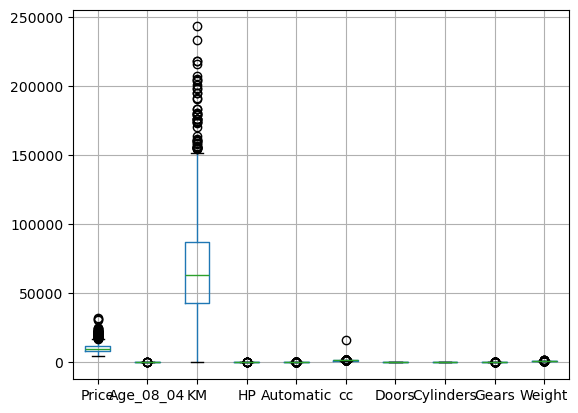

In [16]:
df.boxplot()

In [17]:
def outliers_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
for col in df.select_dtypes(['int','float']).columns:
    outliers_capping(df,col)

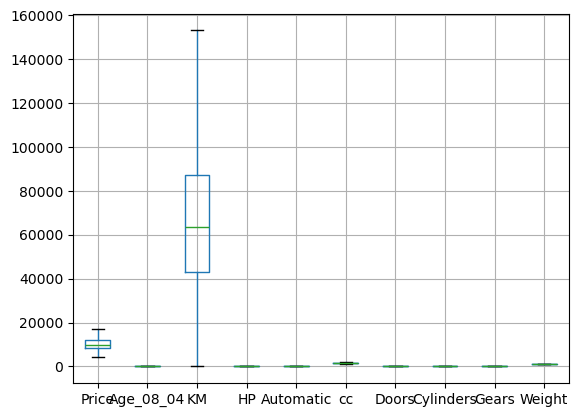

In [18]:
df.boxplot()
plt.show()

In [19]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000,1435.0,1435.0,1435.000000
mean,10495.964460,55.992334,67644.520383,101.093380,0.0,1558.327526,4.032753,4.0,5.0,1068.520906
std,2977.598549,18.529725,34725.393258,13.146145,0.0,168.788311,0.952667,0.0,0.0,37.722708
min,4350.000000,5.000000,1.000000,69.000000,0.0,1300.000000,2.000000,4.0,5.0,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.0,1400.000000,3.000000,4.0,5.0,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.0,1600.000000,4.000000,4.0,5.0,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.0,1600.000000,5.000000,4.0,5.0,1085.000000
max,17200.000000,80.000000,153103.750000,140.000000,0.0,1900.000000,5.000000,4.0,5.0,1152.500000


In [20]:
num_col=[i for i in df.columns if df[i].dtype!='O']

In [21]:
num_col

['Price',
 'Age_08_04',
 'KM',
 'HP',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Weight']

In [22]:
df[num_col]

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500.0,23.0,46986.0,90.0,0.0,1900.0,3,4,5.0,1152.5
1,13750.0,23.0,72937.0,90.0,0.0,1900.0,3,4,5.0,1152.5
2,13950.0,24.0,41711.0,90.0,0.0,1900.0,3,4,5.0,1152.5
3,14950.0,26.0,48000.0,90.0,0.0,1900.0,3,4,5.0,1152.5
4,13750.0,30.0,38500.0,90.0,0.0,1900.0,3,4,5.0,1152.5
...,...,...,...,...,...,...,...,...,...,...
1430,7500.0,69.0,20544.0,86.0,0.0,1300.0,3,4,5.0,1025.0
1431,10845.0,72.0,19000.0,86.0,0.0,1300.0,3,4,5.0,1015.0
1432,8500.0,71.0,17016.0,86.0,0.0,1300.0,3,4,5.0,1015.0
1433,7250.0,70.0,16916.0,86.0,0.0,1300.0,3,4,5.0,1015.0


In [23]:
corr=df[num_col].corr()

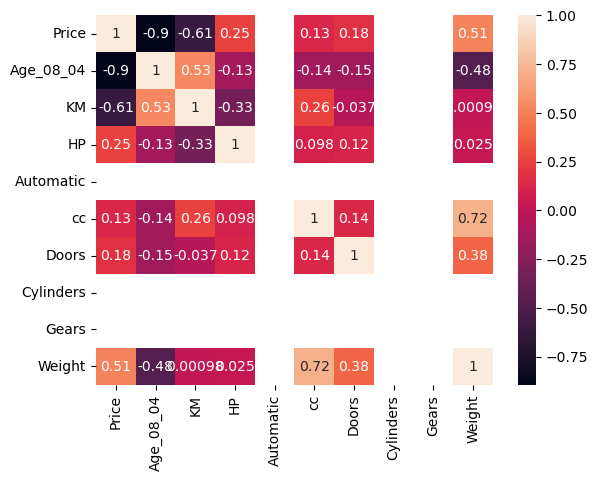

In [24]:
sns.heatmap(corr,annot=True)
plt.show()

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
vif=pd.DataFrame()
vif['columns']=df[num_col].columns
vif['VIF']=[variance_inflation_factor(df[num_col].values,i) for i in range(len(df[num_col].columns))]

In [28]:
vif.sort_values(by='VIF',ascending=False)

,columns,VIF
0,Price,7.346613
1,Age_08_04,5.358279
9,Weight,4.348467
5,cc,2.956430
2,KM,2.167375
3,HP,1.354444
6,Doors,1.290231
7,Cylinders,0.000000
8,Gears,0.000000
4,Automatic,NaN


In [180]:
data= pd.DataFrame(df)

In [182]:
data.drop(columns=['Cylinders', 'Gears', 'Automatic'], inplace=True)

In [184]:
data

,Price,Age_08_04,KM,Fuel_Type,HP,cc,Doors,Weight
0,13500.0,23.0,46986.0,Diesel,90.0,1900.0,3,1152.5
1,13750.0,23.0,72937.0,Diesel,90.0,1900.0,3,1152.5
2,13950.0,24.0,41711.0,Diesel,90.0,1900.0,3,1152.5
3,14950.0,26.0,48000.0,Diesel,90.0,1900.0,3,1152.5
4,13750.0,30.0,38500.0,Diesel,90.0,1900.0,3,1152.5
...,...,...,...,...,...,...,...,...
1430,7500.0,69.0,20544.0,Petrol,86.0,1300.0,3,1025.0
1431,10845.0,72.0,19000.0,Petrol,86.0,1300.0,3,1015.0
1432,8500.0,71.0,17016.0,Petrol,86.0,1300.0,3,1015.0
1433,7250.0,70.0,16916.0,Petrol,86.0,1300.0,3,1015.0


In [186]:
cat_col=[i for i in df.columns if df[i].dtype=='O']

In [188]:
df[cat_col]

,Fuel_Type
0,Diesel
1,Diesel
2,Diesel
3,Diesel
4,Diesel
...,...
1430,Petrol
1431,Petrol
1432,Petrol
1433,Petrol


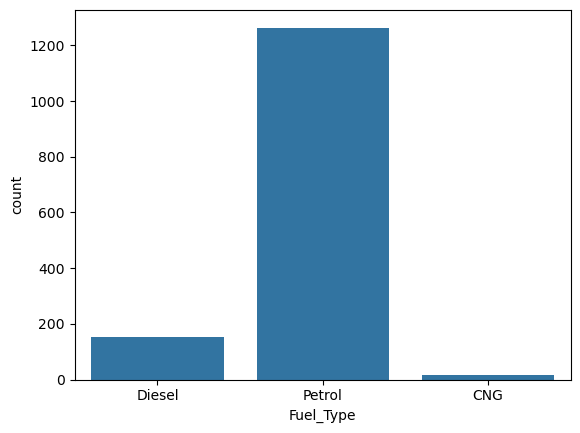

In [190]:
sns.countplot(data=df[cat_col],x='Fuel_Type')
plt.show()

In [192]:
data

,Price,Age_08_04,KM,Fuel_Type,HP,cc,Doors,Weight
0,13500.0,23.0,46986.0,Diesel,90.0,1900.0,3,1152.5
1,13750.0,23.0,72937.0,Diesel,90.0,1900.0,3,1152.5
2,13950.0,24.0,41711.0,Diesel,90.0,1900.0,3,1152.5
3,14950.0,26.0,48000.0,Diesel,90.0,1900.0,3,1152.5
4,13750.0,30.0,38500.0,Diesel,90.0,1900.0,3,1152.5
...,...,...,...,...,...,...,...,...
1430,7500.0,69.0,20544.0,Petrol,86.0,1300.0,3,1025.0
1431,10845.0,72.0,19000.0,Petrol,86.0,1300.0,3,1015.0
1432,8500.0,71.0,17016.0,Petrol,86.0,1300.0,3,1015.0
1433,7250.0,70.0,16916.0,Petrol,86.0,1300.0,3,1015.0


In [194]:
df1=pd.get_dummies(data,dtype='int')

In [196]:
df1

,Price,Age_08_04,KM,HP,cc,Doors,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,23.0,46986.0,90.0,1900.0,3,1152.5,0,1,0
1,13750.0,23.0,72937.0,90.0,1900.0,3,1152.5,0,1,0
2,13950.0,24.0,41711.0,90.0,1900.0,3,1152.5,0,1,0
3,14950.0,26.0,48000.0,90.0,1900.0,3,1152.5,0,1,0
4,13750.0,30.0,38500.0,90.0,1900.0,3,1152.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1430,7500.0,69.0,20544.0,86.0,1300.0,3,1025.0,0,0,1
1431,10845.0,72.0,19000.0,86.0,1300.0,3,1015.0,0,0,1
1432,8500.0,71.0,17016.0,86.0,1300.0,3,1015.0,0,0,1
1433,7250.0,70.0,16916.0,86.0,1300.0,3,1015.0,0,0,1


In [198]:
target=df1[['Price']]

In [200]:
feature=df1.drop(columns='Price')

In [202]:
target

,Price
0,13500.0
1,13750.0
2,13950.0
3,14950.0
4,13750.0
...,...
1430,7500.0
1431,10845.0
1432,8500.0
1433,7250.0


In [204]:
feature

,Age_08_04,KM,HP,cc,Doors,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23.0,46986.0,90.0,1900.0,3,1152.5,0,1,0
1,23.0,72937.0,90.0,1900.0,3,1152.5,0,1,0
2,24.0,41711.0,90.0,1900.0,3,1152.5,0,1,0
3,26.0,48000.0,90.0,1900.0,3,1152.5,0,1,0
4,30.0,38500.0,90.0,1900.0,3,1152.5,0,1,0
...,...,...,...,...,...,...,...,...,...
1430,69.0,20544.0,86.0,1300.0,3,1025.0,0,0,1
1431,72.0,19000.0,86.0,1300.0,3,1015.0,0,0,1
1432,71.0,17016.0,86.0,1300.0,3,1015.0,0,0,1
1433,70.0,16916.0,86.0,1300.0,3,1015.0,0,0,1


In [206]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             1435 non-null   float64
 1   Age_08_04         1435 non-null   float64
 2   KM                1435 non-null   float64
 3   HP                1435 non-null   float64
 4   cc                1435 non-null   float64
 5   Doors             1435 non-null   int64  
 6   Weight            1435 non-null   float64
 7   Fuel_Type_CNG     1435 non-null   int32  
 8   Fuel_Type_Diesel  1435 non-null   int32  
 9   Fuel_Type_Petrol  1435 non-null   int32  
dtypes: float64(6), int32(3), int64(1)
memory usage: 95.4 KB


In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
std_sca=StandardScaler()

In [208]:
df1[['KM','HP','cc','Weight']]=std_sca.fit_transform(df1[['KM','HP','cc','Weight']])

In [210]:
df1

,Price,Age_08_04,KM,HP,cc,Doors,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,23.0,-0.595118,-0.844145,2.024972,3,2.226997,0,1,0
1,13750.0,23.0,0.152463,-0.844145,2.024972,3,2.226997,0,1,0
2,13950.0,24.0,-0.747078,-0.844145,2.024972,3,2.226997,0,1,0
3,14950.0,26.0,-0.565908,-0.844145,2.024972,3,2.226997,0,1,0
4,13750.0,30.0,-0.839578,-0.844145,2.024972,3,2.226997,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1430,7500.0,69.0,-1.356844,-1.148522,-1.531016,3,-1.154108,0,0,1
1431,10845.0,72.0,-1.401323,-1.148522,-1.531016,3,-1.419293,0,0,1
1432,8500.0,71.0,-1.458477,-1.148522,-1.531016,3,-1.419293,0,0,1
1433,7250.0,70.0,-1.461357,-1.148522,-1.531016,3,-1.419293,0,0,1


In [212]:
from sklearn.model_selection import train_test_split

In [331]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.80,random_state=11)

In [333]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 9)
(287, 9)
(1148, 1)
(287, 1)


In [335]:
from sklearn.linear_model import LinearRegression

In [337]:
lin_model=LinearRegression()


In [339]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [341]:
lin_model.coef_

array([[-108.07019219, -497.21563444,  407.98746633, -424.90995655,
         -89.94074944,  910.48047122, -783.70850769,  335.9675324 ,
         447.74097529]])

In [343]:
lin_model.intercept_

array([16505.48579662])

In [345]:
from sklearn.metrics import r2_score

In [347]:
##training validation
y_pred=lin_model.predict(x_train)

In [349]:
rsquared=r2_score(y_train,y_pred)
rsquared

0.864686325580736

In [351]:
##testing validation
y_pred1=lin_model.predict(x_test)

In [236]:
r2_score(y_test,y_pred1)

0.862831857127946

# model2

In [239]:
df1

,Price,Age_08_04,KM,HP,cc,Doors,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,23.0,-0.595118,-0.844145,2.024972,3,2.226997,0,1,0
1,13750.0,23.0,0.152463,-0.844145,2.024972,3,2.226997,0,1,0
2,13950.0,24.0,-0.747078,-0.844145,2.024972,3,2.226997,0,1,0
3,14950.0,26.0,-0.565908,-0.844145,2.024972,3,2.226997,0,1,0
4,13750.0,30.0,-0.839578,-0.844145,2.024972,3,2.226997,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1430,7500.0,69.0,-1.356844,-1.148522,-1.531016,3,-1.154108,0,0,1
1431,10845.0,72.0,-1.401323,-1.148522,-1.531016,3,-1.419293,0,0,1
1432,8500.0,71.0,-1.458477,-1.148522,-1.531016,3,-1.419293,0,0,1
1433,7250.0,70.0,-1.461357,-1.148522,-1.531016,3,-1.419293,0,0,1


In [247]:
model2=df1.drop(columns=(['Doors','HP','KM']))

In [249]:
model2

,Price,Age_08_04,cc,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,23.0,2.024972,2.226997,0,1,0
1,13750.0,23.0,2.024972,2.226997,0,1,0
2,13950.0,24.0,2.024972,2.226997,0,1,0
3,14950.0,26.0,2.024972,2.226997,0,1,0
4,13750.0,30.0,2.024972,2.226997,0,1,0
...,...,...,...,...,...,...,...
1430,7500.0,69.0,-1.531016,-1.154108,0,0,1
1431,10845.0,72.0,-1.531016,-1.419293,0,0,1
1432,8500.0,71.0,-1.531016,-1.419293,0,0,1
1433,7250.0,70.0,-1.531016,-1.419293,0,0,1


In [251]:
target=model2[['Price']]

In [253]:
feature=model2.drop(columns='Price')

In [255]:
target

,Price
0,13500.0
1,13750.0
2,13950.0
3,14950.0
4,13750.0
...,...
1430,7500.0
1431,10845.0
1432,8500.0
1433,7250.0


In [257]:
feature

,Age_08_04,cc,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23.0,2.024972,2.226997,0,1,0
1,23.0,2.024972,2.226997,0,1,0
2,24.0,2.024972,2.226997,0,1,0
3,26.0,2.024972,2.226997,0,1,0
4,30.0,2.024972,2.226997,0,1,0
...,...,...,...,...,...,...
1430,69.0,-1.531016,-1.154108,0,0,1
1431,72.0,-1.531016,-1.419293,0,0,1
1432,71.0,-1.531016,-1.419293,0,0,1
1433,70.0,-1.531016,-1.419293,0,0,1


In [353]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.80,random_state=15)

In [355]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 9)
(287, 9)
(1148, 1)
(287, 1)


In [357]:
lin_model=LinearRegression()

In [359]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [361]:
lin_model.coef_

array([[-105.35576632, -551.64552505,  278.50343781, -359.54314919,
        -107.73856921,  911.46568278, -574.06384344,   53.6863908 ,
         520.37745264]])

In [363]:
lin_model.intercept_

array([16381.42531215])

In [365]:
y_pred=lin_model.predict(x_train)

In [367]:
rsquared=r2_score(y_train,y_pred)
rsquared

0.8599608155218739

In [369]:
y_pred1=lin_model.predict(x_test)

In [371]:
r2_score(y_test,y_pred1)

0.8843448279359464

# model3- statsmodel

In [280]:
import statsmodels.formula.api as sfa

In [282]:
df1

,Price,Age_08_04,KM,HP,cc,Doors,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,23.0,-0.595118,-0.844145,2.024972,3,2.226997,0,1,0
1,13750.0,23.0,0.152463,-0.844145,2.024972,3,2.226997,0,1,0
2,13950.0,24.0,-0.747078,-0.844145,2.024972,3,2.226997,0,1,0
3,14950.0,26.0,-0.565908,-0.844145,2.024972,3,2.226997,0,1,0
4,13750.0,30.0,-0.839578,-0.844145,2.024972,3,2.226997,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1430,7500.0,69.0,-1.356844,-1.148522,-1.531016,3,-1.154108,0,0,1
1431,10845.0,72.0,-1.401323,-1.148522,-1.531016,3,-1.419293,0,0,1
1432,8500.0,71.0,-1.458477,-1.148522,-1.531016,3,-1.419293,0,0,1
1433,7250.0,70.0,-1.461357,-1.148522,-1.531016,3,-1.419293,0,0,1


In [284]:
model=sfa.ols(formula='Price ~ Age_08_04 + KM+HP+cc+Doors+Weight+Fuel_Type_CNG+Fuel_Type_Diesel',data=df1).fit()

In [286]:
model.params

Intercept           16934.567464
Age_08_04            -107.149388
KM                   -506.156395
HP                    365.100919
cc                   -423.725647
Doors                -103.987189
Weight                919.545238
Fuel_Type_CNG       -1240.796110
Fuel_Type_Diesel      -46.634770
dtype: float64

In [288]:
model.rsquared

0.8657656824667965

In [290]:
model.rsquared_adj

0.8650126147667505

In [292]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1150.
Date:                Tue, 24 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:27:17   Log-Likelihood:                -12073.
No. Observations:                1435   AIC:                         2.416e+04
Df Residuals:                    1426   BIC:                         2.421e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.693e+04    197.083     85.926      0.000    1.65e+04    1.73e+04
Age_08_04         -107.1494      2.303    -46.533      0.000    -111.666    -102.632
KM                -506.1564     40.998    -12.346      0.000    -586.580    -425.733
HP                 365.1009     91.800      3.977      0.000     185.024     545.178
cc                -423.7256    103.353     -4.100      0.000    -626.466    -220.985
Doors             -103.9872     34.613     -3.004      0.003    -171.886     -36.089
Weight             919.5452     56.691     16.220      0.000     808.339    1030.751
Fuel_Type_CNG    -1240.7961    277.513     -4.471      0.000   -1785.174    -696.418
Fuel_Type_Diesel   -46.6348    408.769     -0.114      0.909    -848.487     755.218
==============================================================================
Omnibus:                       78.048   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.087
Skew:                          -0.215   Prob(JB):                     1.47e-51
Kurtosis:                       4.931   Cond. No.                         894.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [295]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [297]:
mean_absolute_error(y_test,y_pred1)

916.8135988714704

In [299]:
mse=mean_squared_error(y_test,y_pred1)
mse

1319090.0642249612

In [301]:
##mean_absolute_percenage _error
mean_absolute_percentage_error(y_test,y_pred1)*100

9.30453766562161

In [303]:
rmse=np.sqrt(mse)

In [305]:
rmse

1148.516462322139

In [307]:
rsquared

0.845241056765374

In [309]:
df.shape

(1435, 11)

In [313]:
N=1435
feature.shape

(1435, 6)

In [315]:
k=6

In [317]:
adj_r=1-(((1-rsquared)*(N-1))/(N-k-1))
adj_r

0.8445908091047243

In [649]:
#Lasso Ridge
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [651]:
df1

,Price,Age_08_04,KM,HP,cc,Doors,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,23.0,-0.595118,-0.844145,2.024972,3,2.226997,0,1,0
1,13750.0,23.0,0.152463,-0.844145,2.024972,3,2.226997,0,1,0
2,13950.0,24.0,-0.747078,-0.844145,2.024972,3,2.226997,0,1,0
3,14950.0,26.0,-0.565908,-0.844145,2.024972,3,2.226997,0,1,0
4,13750.0,30.0,-0.839578,-0.844145,2.024972,3,2.226997,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1430,7500.0,69.0,-1.356844,-1.148522,-1.531016,3,-1.154108,0,0,1
1431,10845.0,72.0,-1.401323,-1.148522,-1.531016,3,-1.419293,0,0,1
1432,8500.0,71.0,-1.458477,-1.148522,-1.531016,3,-1.419293,0,0,1
1433,7250.0,70.0,-1.461357,-1.148522,-1.531016,3,-1.419293,0,0,1


In [653]:
target=df1[['Price']]

In [655]:
feature=df1.drop(columns='Price')

In [657]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.75,random_state=190)

In [659]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1076, 9)
(359, 9)
(1076, 1)
(359, 1)


In [691]:
lasso=Lasso(alpha=1)

In [693]:
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [695]:
lasso.coef_

array([ -106.44877252,  -507.36319148,   314.29048809,  -368.6050708 ,
        -125.23397473,   934.88444305, -1246.9283233 ,     0.        ,
         343.99807701])

In [697]:
lasso.intercept_

array([16661.83528336])

In [699]:
y_pred=lasso.predict(x_test)

In [701]:
from sklearn.metrics import r2_score

In [703]:
r2_score(y_test,y_pred)

0.8501129801129895

In [705]:
#grid search

In [707]:
params=dict(alpha=range(1,100))

In [709]:
from sklearn.model_selection import GridSearchCV

In [711]:
grid_search=GridSearchCV(lasso,params)

In [713]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(alpha=1), param_grid={'alpha': range(1, 100)})

In [714]:
grid_search.best_params_

{'alpha': 1}

In [753]:
ridge=Ridge(alpha=3)

In [755]:
ridge.fit(x_train,y_train)

Ridge(alpha=3)

In [757]:
ridge.coef_

array([[-106.65932252, -510.78512402,  292.39692781, -341.70735812,
        -124.62234056,  927.71650756, -829.39967615,  196.51047087,
         632.88920528]])

In [759]:
ridge.intercept_

array([16390.92397548])

In [761]:
y_pred=ridge.predict(x_test)

In [763]:
from sklearn.metrics import r2_score

In [765]:
r2_score(y_test,y_pred)


0.8504957025347566

In [767]:
params=dict(alpha=range(1,100))

In [769]:
grid_search=GridSearchCV(ridge,params)

In [771]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(alpha=3), param_grid={'alpha': range(1, 100)})

In [772]:
grid_search.best_params_

{'alpha': 3}

# Interview Questions:

